In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
def softmax(h):
    return(np.exp(h.T)/np.sum(np.exp(h), axis=1)).T


def cross_entropy(Y, P_hat):
    return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat), axis=1), axis=0)

def accuracy(y,y_hat):
    return np.mean(y==y_hat)

def indices_to_one_hot(data, nb_classes):
    targets= np.array(data).reshape(-1)

    return np.eye(nb_classes)[targets]

In [56]:
class MVLogisticRegression():
    def __init__(self, thresh=0.5):
        self.thresh=thresh
        self.W = None

    def fit(self, X, y, eta=2e-1, epochs=1e3, lambd = 0, p = 0,  show_curve = False):

        epochs=int(epochs)
    
        N,D= X.shape
    
        K=len(np.unique(y))
    
        Y_values = np.unique(y,return_index=False)
    
        Y= indices_to_one_hot(y,K).astype(int)
    
        self.W=np.random.randn(D,K)
        
        
        self.B=np.random.randn(N,K)

        
        J=np.zeros(int(epochs))

        for epoch in range(epochs):      
            P_hat=self.__forward__(X)
            J[epoch]= cross_entropy(Y,P_hat)
            #self.W-= eta*(1/N)*X.T@(P_hat - Y)
            self.W -= eta*(1/N)*X.T@(P_hat - Y) + (lambd/N)* (abs(self.W)**p)
            self.B-= eta*(1/N)*np.sum(P_hat - Y, axis=0)

        if show_curve:
            plt.figure()
                     
            plt.plot(J)
            
            plt.xlabel("epochs")
            
            plt.ylabel("$\mathcal{J}$")
            
            plt.title("Training Curve")
            
            plt.show()

    
    def __forward__(self, X):
        return softmax(X@self.W + self.B)

    def predict(self, X):
        return np.argmax(self.__forward__(X), axis=1)

In [71]:
data= pd.read_csv("xor.csv", header=0)

data.head()
X=data.to_numpy()

In [5]:
y= data['2'].to_numpy()
X=data[['0','1']].to_numpy()

KeyError: '2'

In [8]:
X.shape

(4000, 3)

In [72]:
X

array([[ 1.90756726,  0.32586513,  0.        ],
       [ 2.27054368,  2.25881652,  0.        ],
       [ 2.32308573,  1.46660143,  0.        ],
       ...,
       [ 3.0596909 , -2.87353245,  1.        ],
       [ 3.52560718, -2.33106954,  1.        ],
       [ 1.72005898, -1.13464011,  1.        ]])

In [16]:
X[: 1]

array([[1.90756726, 0.32586513, 0.        ]])

In [18]:
X[-1].shape

(3,)

In [19]:
X[:-1].shape

(3999, 3)

In [28]:
X[:-1, 0].shape

(3999,)

In [33]:
y = X[:-1, 2]


array([0., 0., 0., ..., 1., 1., 1.])

In [34]:
X[:-1,:2]

array([[ 1.90756726,  0.32586513],
       [ 2.27054368,  2.25881652],
       [ 2.32308573,  1.46660143],
       ...,
       [ 1.54169441, -1.14053451],
       [ 3.0596909 , -2.87353245],
       [ 3.52560718, -2.33106954]])

In [35]:
X_tra = X[:-1, :2]
X_tra.shape

(3999, 2)

In [30]:
X[:-1].shape

(3999, 3)

In [31]:
X[:-1,  0]

array([1.90756726, 2.27054368])

In [73]:
y = X[:-1, 2]
X_tra =  X[:-1, :2]

In [54]:
y.shape
X_tra

array([[ 1.90756726,  0.32586513],
       [ 2.27054368,  2.25881652],
       [ 2.32308573,  1.46660143],
       ...,
       [ 1.54169441, -1.14053451],
       [ 3.0596909 , -2.87353245],
       [ 3.52560718, -2.33106954]])

In [70]:
X_tra.shape

(3999, 2)

In [ ]:
y.shape

In [74]:
y = y.astype(int)

In [89]:
logreg=MVLogisticRegression()

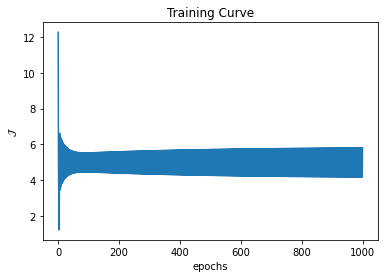

In [95]:
logreg.fit(X_tra,y,lambd =1,p = 2,  show_curve=True)

In [96]:
y_hat=logreg.predict(X_tra)

In [97]:
accuracy(y,y_hat)

0.4988747186796699

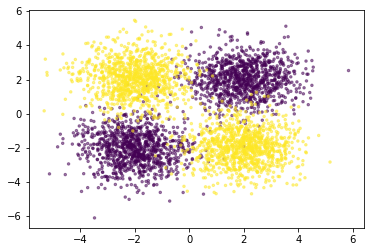

In [80]:
plt.figure()
plt.scatter(X_tra[:,0], X_tra[:,1], c=y, alpha=0.5, s=6)

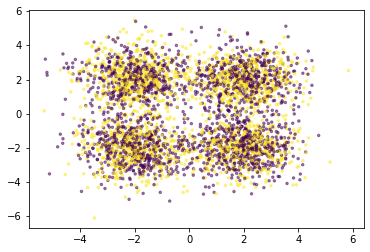

In [81]:
plt.figure()
plt.scatter(X_tra[:,0], X_tra[:,1], c=y_hat, alpha=0.5, s=6)

In [85]:
X_tra1 = X_tra**2

In [87]:
X_tra = np.concatenate((X_tra, X_tra), axis = 1)

In [88]:
X_tra.shape

(3999, 4)

In [ ]:
log

In [62]:
data= pd.read_csv("TrippleGauss.csv", header=0)

data.head()
X=data.to_numpy()

In [63]:
X

array([[ 0.00000000e+00,  1.63858874e+00,  2.66967038e+00,
         0.00000000e+00],
       [ 1.00000000e+00,  1.18285988e+00,  2.63727502e+00,
         0.00000000e+00],
       [ 2.00000000e+00,  1.49823908e+00,  3.01876869e+00,
         0.00000000e+00],
       ...,
       [ 2.99700000e+03, -6.29885990e-01,  3.19971992e+00,
         2.00000000e+00],
       [ 2.99800000e+03, -2.07995910e+00,  2.88806426e+00,
         2.00000000e+00],
       [ 2.99900000e+03, -3.35408131e+00,  1.31269449e+00,
         2.00000000e+00]])

In [64]:
y= data['2'].to_numpy()
X=data[['0','1']].to_numpy()

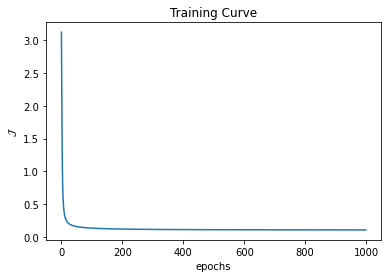

In [65]:
logreg.fit(X,y, show_curve=True)

In [66]:
y_hat=logreg.predict(X)

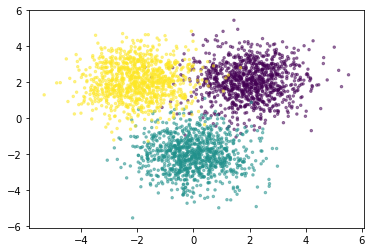

In [67]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.5, s=6)

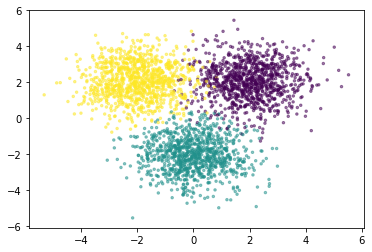

In [68]:
plt.figure()
plt.scatter(X[:,0], X[:,1], c=y_hat, alpha=0.5, s=6)

In [69]:
accuracy(y,y_hat)

0.9653333333333334